## This project for analyzing survey Data in R, including calculating survey-weighted means and proportions, visualizing data, and multiple linear regression.

In [2]:
# Load the NHANES and dplyr packages
# install.packages('NHANES')
library(NHANES)
library(dplyr)

# Load the NHANESraw data
data("NHANESraw")
glimpse(NHANESraw)
head(NHANESraw)

Rows: 20,293
Columns: 78
$ ID               <int> 51624, 51625, 51626, 51627, 51628, 51629, 51630, 5...
$ SurveyYr         <fct> 2009_10, 2009_10, 2009_10, 2009_10, 2009_10, 2009_...
$ Gender           <fct> male, male, male, male, female, male, female, fema...
$ Age              <int> 34, 4, 16, 10, 60, 26, 49, 1, 10, 80, 10, 80, 4, 3...
$ AgeMonths        <int> 409, 49, 202, 131, 722, 313, 596, 12, 124, NA, 121...
$ Race1            <fct> White, Other, Black, Black, Black, Mexican, White,...
$ Race3            <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ Education        <fct> High School, NA, NA, NA, High School, 9 - 11th Gra...
$ MaritalStatus    <fct> Married, NA, NA, NA, Widowed, Married, LivePartner...
$ HHIncome         <fct> 25000-34999, 20000-24999, 45000-54999, 20000-24999...
$ HHIncomeMid      <int> 30000, 22500, 50000, 22500, 12500, 30000, 40000, 4...
$ Poverty          <dbl> 1.36, 1.07, 2.27, 0.81, 0.69, 1.01, 1.91, 1.36, 2....
$ HomeRooms        <int> 6,

ID,SurveyYr,Gender,Age,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,PregnantNow
51624,2009_10,male,34,409,White,NA,High School,Married,25000-34999,...,16,8,1,No,Heterosexual,80100.54,81528.77,1,83,NA
51625,2009_10,male,4,49,Other,NA,NA,NA,20000-24999,...,NA,NA,NA,NA,NA,53901.10,56995.04,2,79,NA
51626,2009_10,male,16,202,Black,NA,NA,NA,45000-54999,...,NA,NA,NA,NA,NA,13953.08,14509.28,1,84,NA
51627,2009_10,male,10,131,Black,NA,NA,NA,20000-24999,...,NA,NA,NA,NA,NA,11664.90,12041.64,2,86,NA
51628,2009_10,female,60,722,Black,NA,High School,Widowed,10000-14999,...,15,4,NA,No,NA,20090.34,21000.34,2,75,NA
51629,2009_10,male,26,313,Mexican,NA,9 - 11th Grade,Married,25000-34999,...,9,10,1,No,Heterosexual,22537.83,22633.58,1,88,NA


sum(WTMEC4YR)
304267200


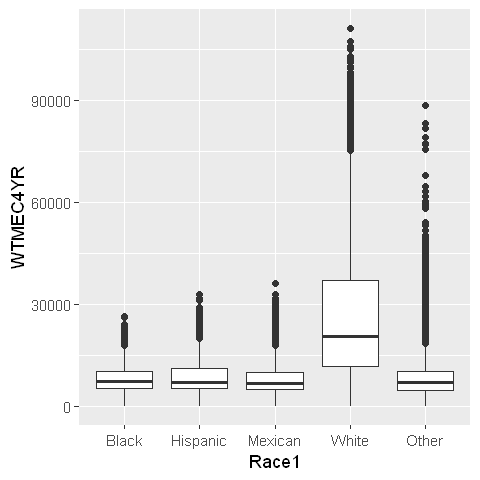

In [4]:
# Load the ggplot2 package
library(ggplot2)
# Create a 4-year weight variable and call it WTMEC4YR
# Since NHANESraw data spans 4 years (2009–2012) and the sampling weights are based on 2 years of data.
NHANESraw <- NHANESraw %>% mutate(WTMEC4YR = WTMEC2YR/2)
# Calculate the sum of this weight variable
NHANESraw %>% summarize(sum(WTMEC4YR))

# Plot (weights using boxplots ~ Race1)
NHANESraw %>% 
   ggplot(aes(x = Race1, y = WTMEC4YR)) + geom_boxplot()
options(repr.plot.width = 4, repr.plot.height = 4)

In [6]:
# Load the survey package
#install.packages('survey')
library(survey)
library(grid)
library(Matrix)
# Specify the survey design
nhanes_design <- svydesign(data = NHANESraw, strata = ~SDMVSTRA, id = ~SDMVPSU, 
                           nest = TRUE, weights = ~WTMEC4YR)

# design has only two PSUs per stratum, PSU: primary sampling unit
# SDMVPSU accounts for design effects of clustering. There clusters(PSU) are nested within strata.
summary(nhanes_design)

Stratified 1 - level Cluster Sampling design (with replacement)
With (62) clusters.
svydesign(data = NHANESraw, strata = ~SDMVSTRA, id = ~SDMVPSU, 
    nest = TRUE, weights = ~WTMEC4YR)
Probabilities:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
8.986e-06 5.664e-05 1.054e-04       Inf 1.721e-04       Inf 
Stratum Sizes: 
            75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
obs        803 785 823 829 696 751 696 724 713 683 592 946 598 647 251 862 998
design.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
actual.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
            92  93  94  95  96  97  98  99 100 101 102 103
obs        875 602 688 722 676 608 708 682 700 715 624 296
design.PSU   3   2   2   2   2   2   2   2   2   2   2   2
actual.PSU   3   2   2   2   2   2   2   2   2   2   2   2
Data variables:
 [1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeMon

In [7]:
# Select adults of Age >= 20 with subset
nhanes_adult <- subset(nhanes_design, Age >= 20)
summary(nhanes_adult)

# Compare the number of observations in the full data to the adult data
nrow(nhanes_design)
nrow(nhanes_adult)

Stratified 1 - level Cluster Sampling design (with replacement)
With (62) clusters.
subset(nhanes_design, Age >= 20)
Probabilities:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
8.986e-06 4.303e-05 8.107e-05       Inf 1.240e-04       Inf 
Stratum Sizes: 
            75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
obs        471 490 526 500 410 464 447 400 411 395 357 512 327 355 153 509 560
design.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
actual.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
            92  93  94  95  96  97  98  99 100 101 102 103
obs        483 376 368 454 362 315 414 409 377 460 308 165
design.PSU   3   2   2   2   2   2   2   2   2   2   2   2
actual.PSU   3   2   2   2   2   2   2   2   2   2   2   2
Data variables:
 [1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeMonths"        "Race1"            "Race3"            "Education"       


[1] 20293

[1] 11778

"mean(BMI, na.rm = TRUE)"
28.98217


      mean     SE
BMI 28.734 0.1235

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 547 rows containing non-finite values (stat_bin)."

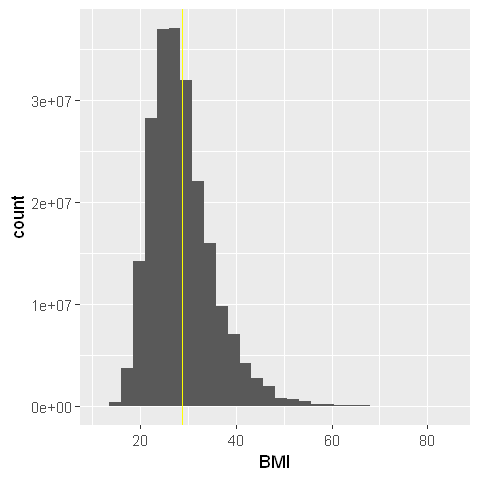

In [11]:
# To estimate the true distribution of measurements about all US population 
# Calculate the mean BMI in NHANESraw
bmi_mean_raw <- NHANESraw %>% 
    filter(Age >= 20) %>%
    summarize(mean(BMI, na.rm=TRUE))
bmi_mean_raw

# Calculate the survey-weighted mean BMI of US adults
bmi_mean <- svymean(~BMI, design = nhanes_adult, na.rm = TRUE)
bmi_mean

# Draw a weighted histogram of BMI in the US population
NHANESraw %>% 
  filter(Age >= 20) %>%
    ggplot(mapping = aes(x = BMI, weight = WTMEC4YR)) + geom_histogram()+
    geom_vline(xintercept = coef(bmi_mean), color="yellow")

The distribution of BMI looks to be about what we might expect with most people under 40 kg/m2 and a slight positive skewness because a few people have much higher BMI.

Warning message:
"package 'broom' was built under R version 3.6.3"Warning message:
"Removed 547 rows containing non-finite values (stat_boxplot)."

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
-1.846458,-9.716503,4.56031e-11,32,-2.218916,-1.473999,Design-based t-test,two.sided


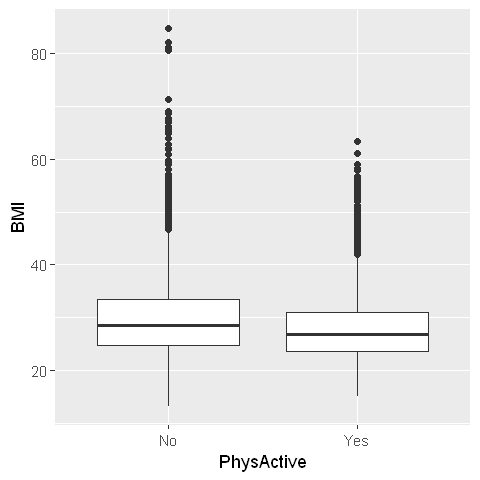

In [12]:
library(broom)
# Make a boxplot
NHANESraw %>% 
  filter(Age>=20) %>%
    ggplot(mapping = aes(x = PhysActive, y = BMI, weight = WTMEC4YR)) + 
    geom_boxplot()

# Conduct a t-test comparing mean BMI between physically active status
survey_ttest <- svyttest(BMI~PhysActive, design = nhanes_adult)

# Use broom to show the tidy results
tidy(survey_ttest)

##  To find what variables are related to smoking.

SmokeNow,PhysActiveNo,PhysActiveYes,se.PhysActiveNo,se.PhysActiveYes
No,0.4566990,0.5433010,0.01738054,0.01738054
Yes,0.5885421,0.4114579,0.01163246,0.01163246


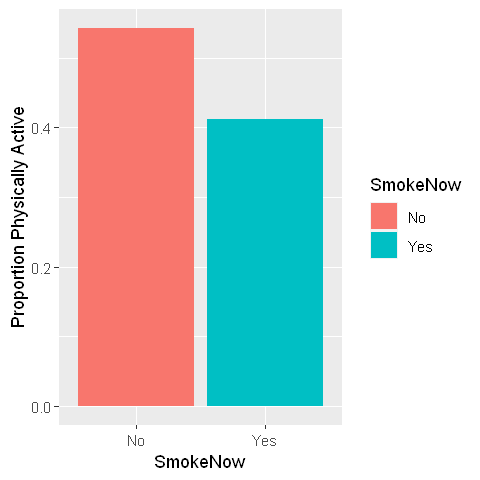

In [13]:
# (1) The relationship between smoking and physical activity.
# Estimate the proportion who are physically active by current smoking status
phys_by_smoke <- svyby(~PhysActive, by = ~SmokeNow, FUN = svymean, design = 
                       nhanes_adult, keep.names = FALSE)
# Print the table
phys_by_smoke

# Plot the proportions with y-label
ggplot(data = phys_by_smoke, 
       aes(y = PhysActiveYes, x = SmokeNow, fill = SmokeNow)) +
    geom_col() + ylab("Proportion Physically Active")

,SmokeNow,BMI,se
No,No,29.25734,0.1915138
Yes,Yes,27.74873,0.1652377


Warning message:
"Removed 244 rows containing non-finite values (stat_boxplot)."

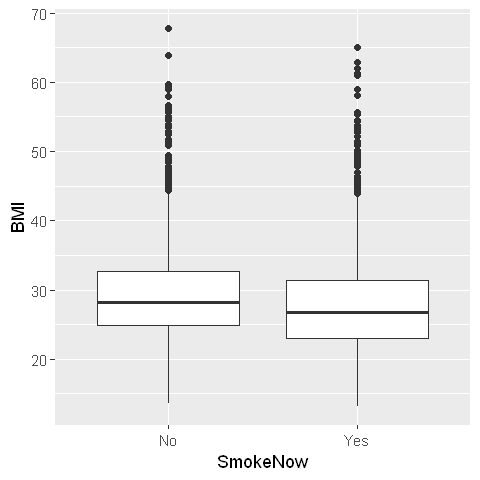

In [14]:
# Estimate mean BMI by current smoking status
BMI_by_smoke <- svyby(~BMI, by = ~SmokeNow, FUN = svymean, design = nhanes_adult, na.rm = TRUE)
BMI_by_smoke

# Plot the distribution of BMI by current smoking status
NHANESraw %>% 
  filter(Age>=20, !is.na(SmokeNow)) %>%
    ggplot(mapping = aes(x = SmokeNow, y = BMI, weight = WTMEC4YR)) + 
    geom_boxplot()
options(repr.plot.width = 4, repr.plot.height = 4)

Warning message:
"Removed 547 rows containing non-finite values (stat_boxplot)."

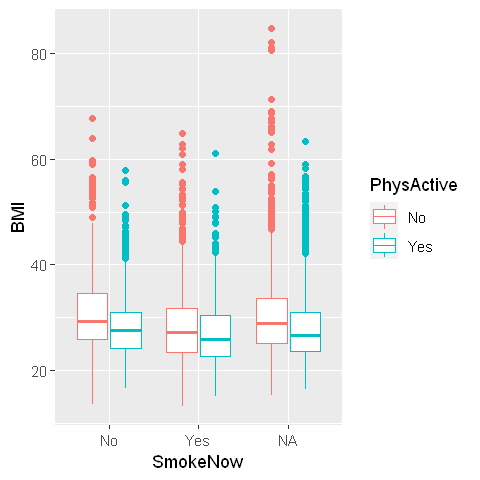

In [15]:
# Plot the distribution of BMI by smoking and physical activity status
NHANESraw %>% 
  filter(Age>=20) %>%
    ggplot(mapping = aes(x = SmokeNow, y = BMI, weight = WTMEC4YR, color = PhysActive)) + 
    geom_boxplot()
options(repr.plot.width = 4, repr.plot.height = 4)

### Incorporate possible confounding in the model.

In [16]:
# Fit a multiple regression model
mod1 <- svyglm(BMI ~ PhysActive*SmokeNow, design = nhanes_adult)

# Tidy the model results
tidy_mod1 <- tidy(mod1)
tidy_mod1

# Calculate expected mean difference in BMI for activity within non-smokers
diff_non_smoke <- tidy_mod1 %>% 
    filter(term=="PhysActiveYes") %>% 
    select(estimate)
diff_non_smoke

# Calculate expected mean difference in BMI for activity within smokers
diff_smoke <- tidy_mod1 %>% 
    filter(term%in%c("PhysActiveYes","PhysActiveYes:SmokeNowYes")) %>% 
    summarize(estimate = sum(estimate))
diff_smoke

term,estimate,std.error,statistic,p.value
(Intercept),30.540997,0.2098466,145.539656,2.619435e-44
PhysActiveYes,-2.350701,0.2358895,-9.965262,4.961177e-11
SmokeNowYes,-2.238390,0.2665632,-8.397223,2.262528e-09
PhysActiveYes:SmokeNowYes,1.004490,0.3435443,2.923903,6.520735e-03


estimate
-2.350701


estimate
-1.346211


 In order to adjust for smoking status, as well as other possible confounders or predictors of BMI, we can use a linear regression model with multiple independent variables. 

In [17]:
# Adjust mod1 for other possible confounders
mod2 <- svyglm(BMI ~ PhysActive*SmokeNow + Race1 + Alcohol12PlusYr + Gender, 
               design = nhanes_adult)
# Tidy the output
tidy(mod2)

term,estimate,std.error,statistic,p.value
(Intercept),33.2378322,0.3162940,105.0852370,1.745688e-33
PhysActiveYes,-2.1140302,0.2729173,-7.7460482,5.559290e-08
SmokeNowYes,-2.2266832,0.3034114,-7.3388252,1.402940e-07
Race1Hispanic,-1.4670407,0.4200193,-3.4927937,1.875493e-03
Race1Mexican,-0.1909654,0.4637845,-0.4117546,6.841735e-01
Race1White,-2.0761158,0.3200810,-6.4862209,1.043842e-06
Race1Other,-3.1050466,0.6202084,-5.0064570,4.089394e-05
Alcohol12PlusYrYes,-0.8549211,0.3575930,-2.3907660,2.501002e-02
Gendermale,-0.2557363,0.2302174,-1.1108470,2.776397e-01
PhysActiveYes:SmokeNowYes,0.7368701,0.3874182,1.9020020,6.923930e-02
